<a href="https://colab.research.google.com/github/lanzetti1/Univesp/blob/main/Univesp_Semana05_SOM_videoaula_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COM510 - Redes Neurais

## Exercício de Apoio - Semana 05

### Rede Neural SOM (Self-Organizing Maps)

- Instalação do Minisom
- Carregamento dos dados
- Treinamento de um modelo
- Gráficos e Avaliação


## Instalação do Minisom

### Minisom Package (Python)

O **Minisom** é um pacote que implementa a rede SOM (Self-Organizing Maps) em Linguagem Python. Foi desenvolvida por Giuseppe Vettigli (2018). O pacote é intitulado **MiniSom: minimalistic and NumPy-based implementation of the Self Organizing Map** (https://github.com/JustGlowing/minisom/)



In [1]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10608 sha256=1228896185b6e9ab7cf019c56bb6c31cc7bcb91a551341e91d663fe10eaebbf3
  Stored in directory: /root/.cache/pip/wheels/7b/fd/40/c318df5c7fa3b276930ab30fed7306b603007e9b24d5479958
Successfully built minisom


### Uso básico

Após importação do pacote, utilizando o comando:

`
    from minisom import MiniSom
`

Uma rede SOM pode ser gerada a partir do comando abaixo:

`
    som = MiniSom(10, 10, 5, sigma=0.3, learning_rate=0.5)
`

Neste exemplo, estamos criando uma rede SOM com 100 neurônios (grid 10x10), cada exemplo está um espaço de atributos com 5 dimensões, a taxa de aprendizagem inicial é configurada em 0,5 e o sigma define a abertura da gaussiana (vizinhança da rede)

O mapa pode ser iniciado utilizando outros parâmetros opcionais:

`
    MiniSom():
    def __init__(self, x, y, input_len, sigma=1.0, learning_rate=0.5,decay_function=asymptotic_decay, neighborhood_function='gaussian', topology='rectangular',activation_distance='euclidean', random_seed=None):
`

Maiores detalhes em: https://github.com/JustGlowing/minisom/blob/master/minisom.py


## Conjunto de dados Iris

<img src="https://upload.wikimedia.org/wikipedia/commons/c/cb/Flores_de_%C3%8Dris.png">

Este dataset contém 150 exemplos, sendo 50 de cada classe: Setosa, Virginica e Versicolor. Os exemplos são caracterizados por quatro atributos: comprimento e largura das pétalas e sépalas.

https://en.wikipedia.org/wiki/Iris_flower_data_set

In [2]:
from minisom import MiniSom
import sklearn.datasets
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# from matplotlib.pyplot import figure
# import matplotlib.gridspec as gridspec
# import sys

### Carga dos dados 

In [3]:
dados = sklearn.datasets.load_iris()
df = pd.DataFrame(dados.data, columns = dados.feature_names)
df['label'] = [dados.target_names[i] for i in dados.target]
# sns.pairplot(df, hue = 'label')


In [4]:
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

         label  
0       se

In [5]:
x = df.drop(['label'], axis=1)

# Normalizando os dados (MinMax)
# normalizador = MinMaxScaler() 
# x_norm = pd.DataFrame(normalizador.fit_transform(x), columns=x.columns)
labels = df.label.unique()

# Tranforming the data for numerical values
df['label'].replace(df['label'].unique(), [0,1,2], inplace=True)
target = df['label'].values
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     label  
0        0  
1

Text(0.5, 1.0, 'Mapa de Correlação entre Atributos')

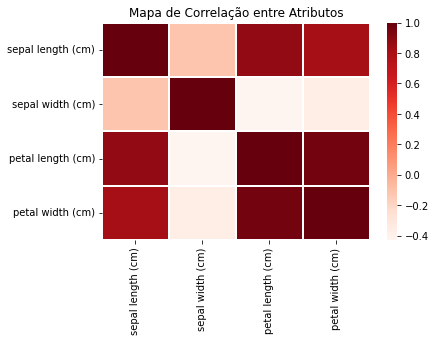

In [6]:
sns.heatmap(x.astype(float).corr(), linewidths = 0.1, linecolor = 'white', cmap="Reds")
plt.title('Mapa de Correlação entre Atributos')

# Modelo 01 (7x5)

## Parâmetros do modelo

In [7]:
sigma = 5
eta = 0.1
epocas = 500
random_seed = 1

neighborhood_function = 'gaussian'
topology = 'rectangular' 
neuD1 = 7 # número de neurônios (dimensão 01 - linhas)
neuD2 = 5 # número de neurônios (dimensao 02 - colunas)

/usr/local/lib/python3.8/dist-packages/minisom.py:162: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


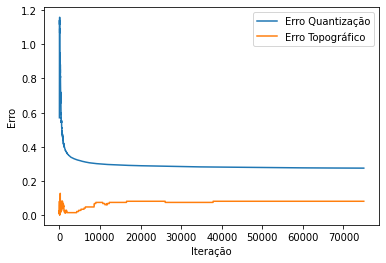

In [8]:
som = MiniSom(neuD1, neuD2, x.shape[1], 
              sigma=sigma, 
              learning_rate=eta,
              neighborhood_function=neighborhood_function, 
              random_seed=random_seed)

som.random_weights_init(x.values)
som.train_random(x.values, epocas)

q_error = []
t_error = []

for i in range(epocas*len(x.values)):
    rand_i = np.random.randint(len(x.values))
    som.update(x.values[rand_i], som.winner(x.values[rand_i]), i, epocas)
    q_error.append(som.quantization_error(x.values))
    t_error.append(som.topographic_error(x.values))

plt.plot(np.arange(epocas*len(x.values)), q_error, label='Erro Quantização')
plt.plot(np.arange(epocas*len(x.values)), t_error, label='Erro Topográfico')
plt.ylabel('Erro')
plt.xlabel('Iteração')
plt.legend()
plt.show()


### Algumas Medidas de Qualidade

In [9]:
# Erro de Quantização

som.quantization_error(x.values)

0.27424028757109103

In [10]:
# Erro Topográfico

som.topographic_error(x.values)

0.08

### U-Matrix

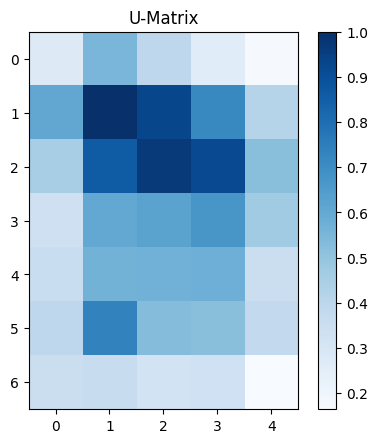

In [11]:
figure (figsize=(5,5),dpi=100)
plt.imshow(som.distance_map(), cmap='Blues') 
plt.title('U-Matrix')
plt.colorbar()
plt.show()

### Hitmap

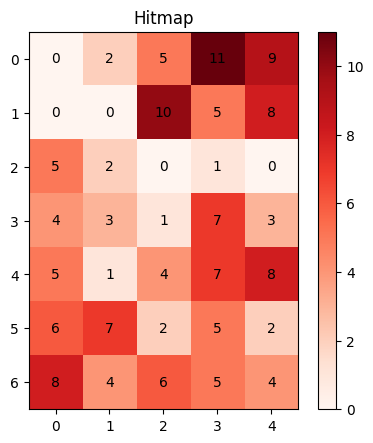

In [12]:
hits = som.activation_response(x.values).astype(int)
# hits = hits.T[::-1]
figure(figsize=(5, 5),dpi=100)
plt.imshow(hits,cmap='Reds')
plt.colorbar()
for (i, j), value in np.ndenumerate(hits):
          plt.text(j, i, value, horizontalalignment='center', verticalalignment='center')

plt.title('Hitmap')
plt.show()

### Heat Maps (mapas de pesos)

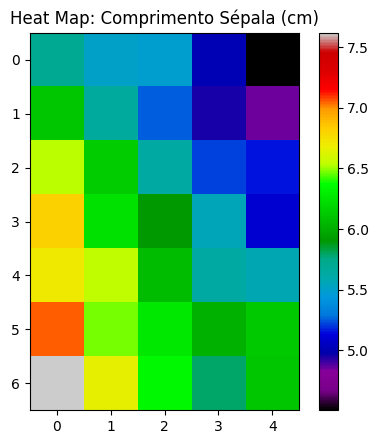

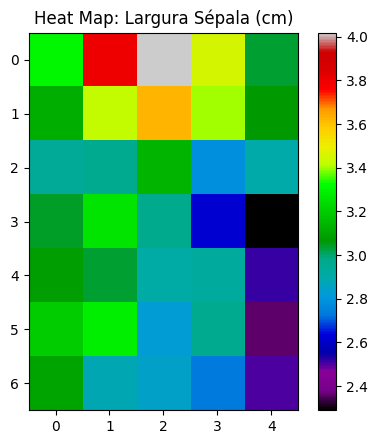

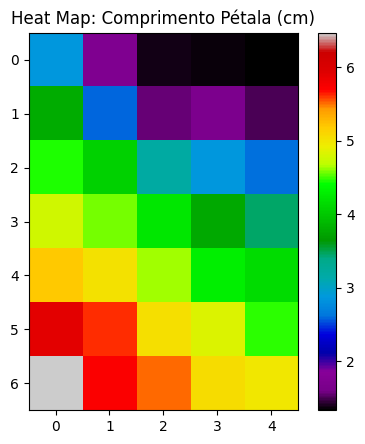

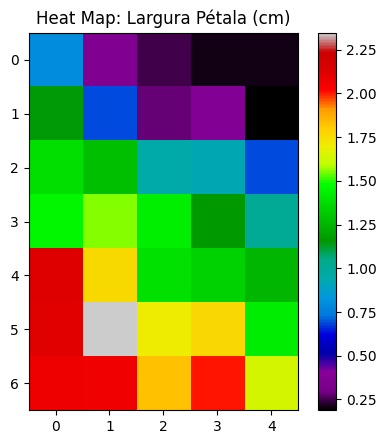

In [13]:
weights = som.get_weights()
figure (figsize=(5,5),dpi=100)
plt.title('Heat Map: Comprimento Sépala (cm)') 
plt.imshow(weights[:, :, 0], cmap='nipy_spectral')
plt.colorbar()
plt.show()

figure (figsize=(5,5),dpi=100)
plt.title('Heat Map: Largura Sépala (cm)') 
plt.imshow(weights[:, :, 1], cmap='nipy_spectral')
plt.colorbar()
plt.show()

figure (figsize=(5,5),dpi=100)
plt.title('Heat Map: Comprimento Pétala (cm)')
plt.imshow(weights[:, :, 2], cmap='nipy_spectral')
plt.colorbar()
plt.show()

figure (figsize=(5,5),dpi=100)
plt.title('Heat Map: Largura Pétala (cm)') 
plt.imshow(weights[:, :, 3], cmap='nipy_spectral')
plt.colorbar()
plt.show()

### Mapa de Distribuição das Classes



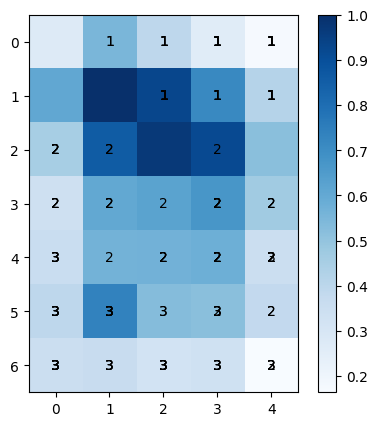

In [14]:
figure (figsize=(5,5),dpi=100)
plt.imshow(som.distance_map(), cmap='Blues') 
plt.colorbar()

# Plotagem das classes associadas a cada neurônio
for idx, xx in enumerate(x.values):
    w = som.winner(xx)  # Encontrando o vencedor para o padrão x
    plt.text(w[1], w[0], target[idx]+1, horizontalalignment='center', verticalalignment='center')


plt.show()

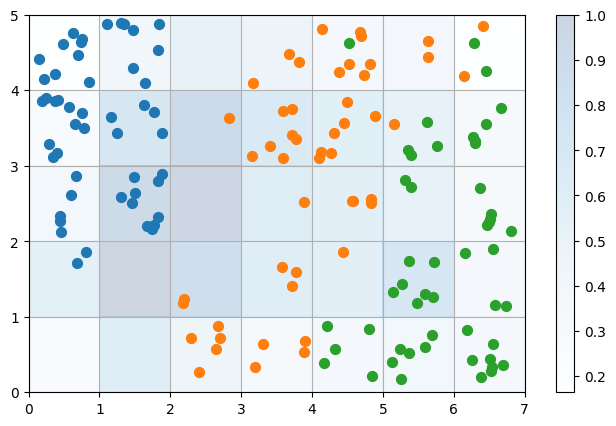

In [15]:
w_x, w_y = zip(*[som.winner(d) for d in x.values])
w_x = np.array(w_x)
w_y = np.array(w_y)

figure (figsize=(8,5),dpi=100)
plt.pcolor(som.distance_map().T, cmap='Blues', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, label=target[c])
plt.grid()
plt.show()

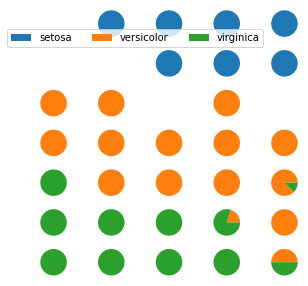

In [16]:
import matplotlib.gridspec as gridspec

labels_map = som.labels_map(x.values, [labels[t] for t in target])

fig = plt.figure(figsize=(5, 5))
the_grid = gridspec.GridSpec(neuD1, neuD2, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in labels]
    plt.subplot(the_grid[position[0],
                         position[1]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, labels, bbox_to_anchor=(3.5, 6.5), ncol=3)
plt.show()

# Modelo 02 (30x20)

## Parâmetros do modelo

In [17]:
sigma = 10
eta = 0.1
epocas = 5000
random_seed = 1

neighborhood_function = 'gaussian'
topology = 'rectangular'
neuD1 = 30 # número de neurônios (dimensão 01 - linhas)
neuD2 = 20 # número de neurônios (dimensao 02 - colunas)

In [18]:
som = MiniSom(neuD1, neuD2, x.shape[1], 
              sigma=sigma, 
              learning_rate=eta,
              neighborhood_function=neighborhood_function, 
              random_seed=random_seed)

som.random_weights_init(x.values)
som.train_random(x.values, epocas)


### Algumas Medidas de Qualidade

In [19]:
# Erro de Quantização

som.quantization_error(x.values)

0.2690198488027468

In [20]:
# Erro Topográfico

som.topographic_error(x.values)

0.02

### U-Matrix

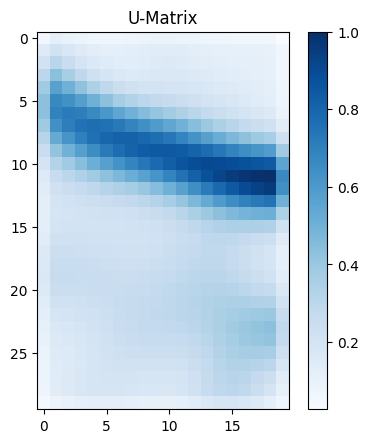

In [21]:
figure (figsize=(5,5),dpi=100)
plt.imshow(som.distance_map(), cmap='Blues') 
plt.title('U-Matrix')
plt.colorbar()
plt.show()

### Hitmap

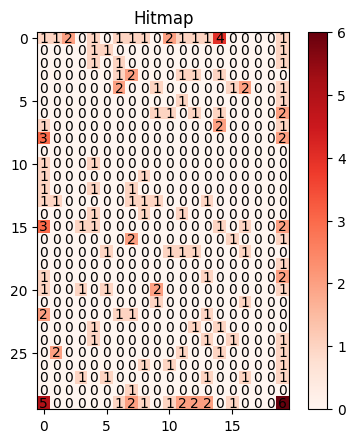

In [22]:
hits = som.activation_response(x.values).astype(int)
# hits = hits.T[::-1]
figure(figsize=(5, 5),dpi=100)
plt.imshow(hits,cmap='Reds')
plt.colorbar()
for (i, j), value in np.ndenumerate(hits):
          plt.text(j, i, value, horizontalalignment='center', verticalalignment='center')

plt.title('Hitmap')
plt.show()

### Heat Maps (mapas de pesos)

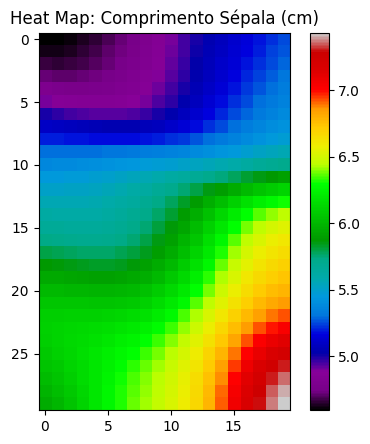

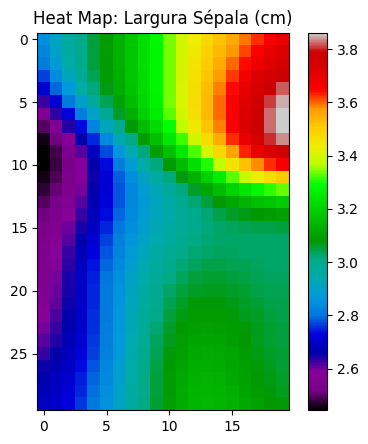

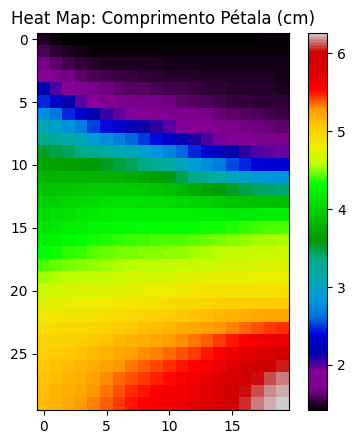

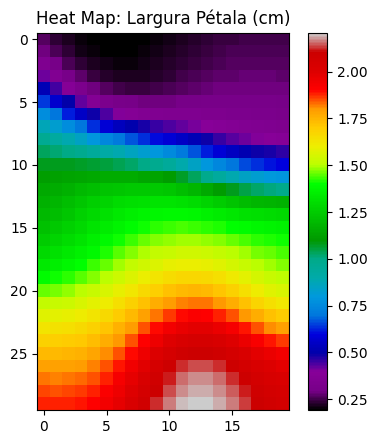

In [23]:
weights = som.get_weights()
figure (figsize=(5,5),dpi=100)
plt.title('Heat Map: Comprimento Sépala (cm)') 
plt.imshow(weights[:, :, 0], cmap='nipy_spectral')
plt.colorbar()
plt.show()

figure (figsize=(5,5),dpi=100)
plt.title('Heat Map: Largura Sépala (cm)') 
plt.imshow(weights[:, :, 1], cmap='nipy_spectral')
plt.colorbar()
plt.show()

figure (figsize=(5,5),dpi=100)
plt.title('Heat Map: Comprimento Pétala (cm)')
plt.imshow(weights[:, :, 2], cmap='nipy_spectral')
plt.colorbar()
plt.show()

figure (figsize=(5,5),dpi=100)
plt.title('Heat Map: Largura Pétala (cm)') 
plt.imshow(weights[:, :, 3], cmap='nipy_spectral')
plt.colorbar()
plt.show()

### Mapa de Distribuição das Classes



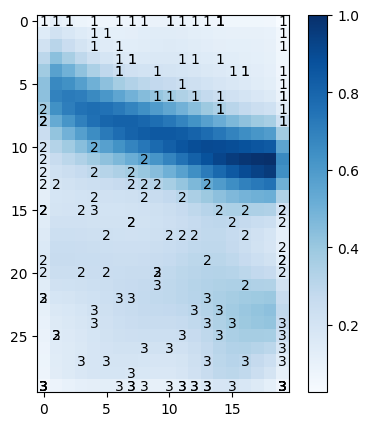

In [24]:
figure (figsize=(5,5),dpi=100)
plt.imshow(som.distance_map(), cmap='Blues') 
plt.colorbar()

# Plotagem das classes associadas a cada neurônio
for idx, xx in enumerate(x.values):
    w = som.winner(xx)  # Encontrando o vencedor para o padrão x
    plt.text(w[1], w[0], target[idx]+1, horizontalalignment='center', verticalalignment='center')


plt.show()

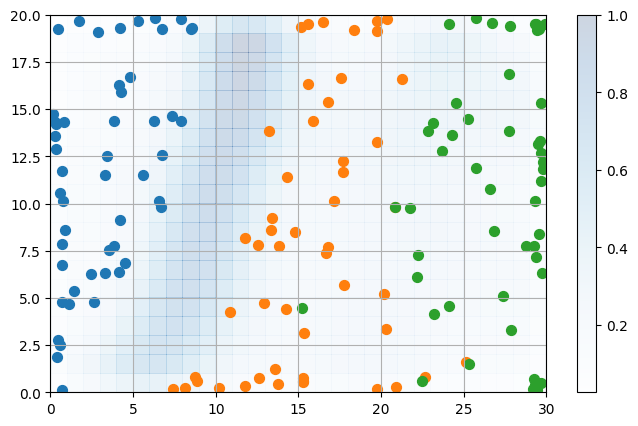

In [25]:
w_x, w_y = zip(*[som.winner(d) for d in x.values])
w_x = np.array(w_x)
w_y = np.array(w_y)

figure (figsize=(8,5),dpi=100)
plt.pcolor(som.distance_map().T, cmap='Blues', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, label=target[c])
plt.grid()
plt.show()

# Modelo 03 (30x20)

## Com vizinhança inadequada


## Parâmetros do modelo

In [26]:
sigma = 1
eta = 0.1
epocas = 5000
random_seed = 1

neighborhood_function = 'gaussian'
topology = 'rectangular'
neuD1 = 30 # número de neurônios (dimensão 01 - linhas)
neuD2 = 20 # número de neurônios (dimensao 02 - colunas)

In [27]:
som = MiniSom(neuD1, neuD2, x.shape[1], 
              sigma=sigma, 
              learning_rate=eta,
              neighborhood_function=neighborhood_function, 
              random_seed=random_seed)

som.random_weights_init(x.values)
som.train_random(x.values, epocas)


### Algumas Medidas de Qualidade

In [28]:
# Erro de Quantização

som.quantization_error(x.values)

0.06921232341885424

In [29]:
# Erro Topográfico

som.topographic_error(x.values)

0.8266666666666667

### U-Matrix

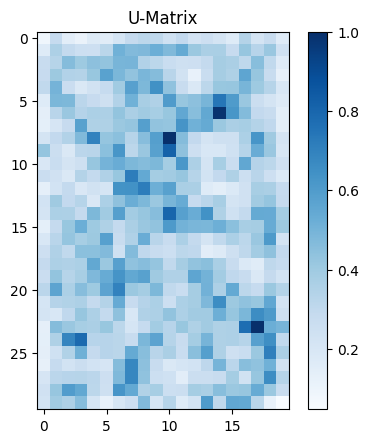

In [30]:
figure (figsize=(5,5),dpi=100)
plt.imshow(som.distance_map(), cmap='Blues') 
plt.title('U-Matrix')
plt.colorbar()
plt.show()

### Hitmap

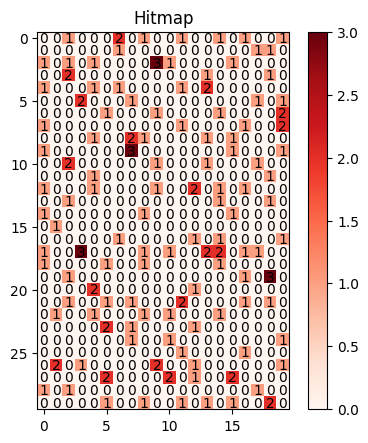

In [31]:
hits = som.activation_response(x.values).astype(int)
# hits = hits.T[::-1]
figure(figsize=(5, 5),dpi=100)
plt.imshow(hits,cmap='Reds')
plt.colorbar()
for (i, j), value in np.ndenumerate(hits):
          plt.text(j, i, value, horizontalalignment='center', verticalalignment='center')

plt.title('Hitmap')
plt.show()

### Heat Maps (mapas de pesos)

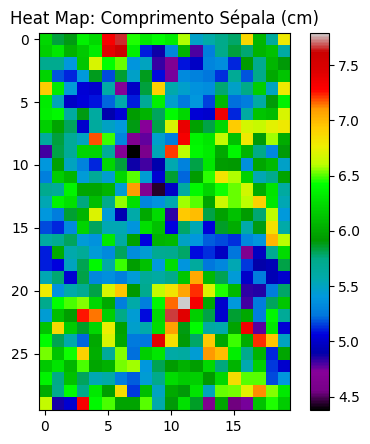

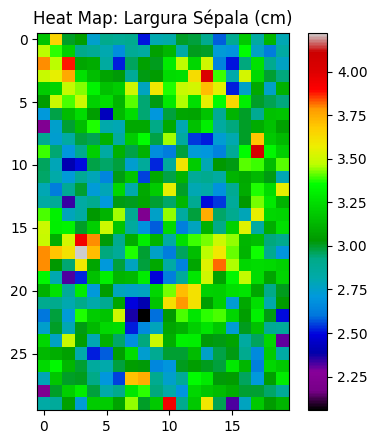

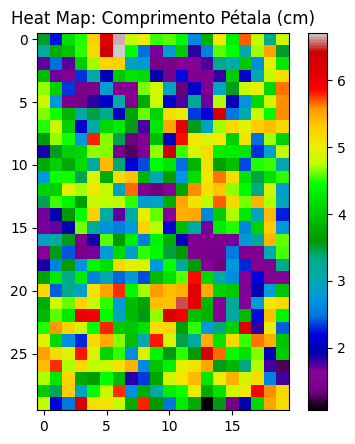

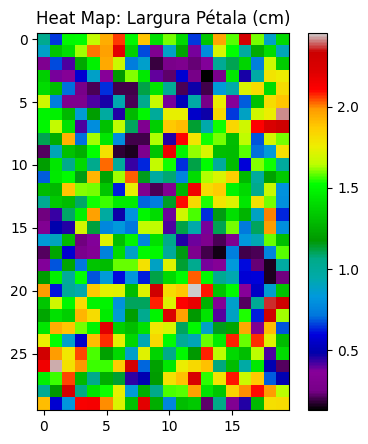

In [32]:
weights = som.get_weights()
figure (figsize=(5,5),dpi=100)
plt.title('Heat Map: Comprimento Sépala (cm)') 
plt.imshow(weights[:, :, 0], cmap='nipy_spectral')
plt.colorbar()
plt.show()

figure (figsize=(5,5),dpi=100)
plt.title('Heat Map: Largura Sépala (cm)') 
plt.imshow(weights[:, :, 1], cmap='nipy_spectral')
plt.colorbar()
plt.show()

figure (figsize=(5,5),dpi=100)
plt.title('Heat Map: Comprimento Pétala (cm)')
plt.imshow(weights[:, :, 2], cmap='nipy_spectral')
plt.colorbar()
plt.show()

figure (figsize=(5,5),dpi=100)
plt.title('Heat Map: Largura Pétala (cm)') 
plt.imshow(weights[:, :, 3], cmap='nipy_spectral')
plt.colorbar()
plt.show()

### Mapa de Distribuição das Classes



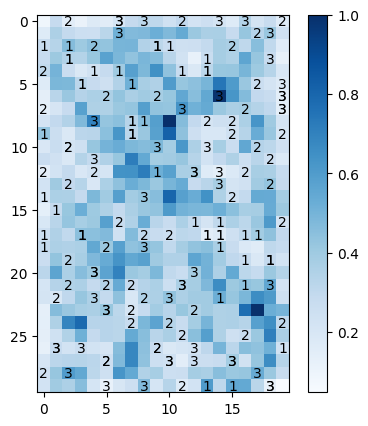

In [33]:
figure (figsize=(5,5),dpi=100)
plt.imshow(som.distance_map(), cmap='Blues') 
plt.colorbar()

# Plotagem das classes associadas a cada neurônio
for idx, xx in enumerate(x.values):
    w = som.winner(xx)  # Encontrando o vencedor para o padrão x
    plt.text(w[1], w[0], target[idx]+1, horizontalalignment='center', verticalalignment='center')


plt.show()

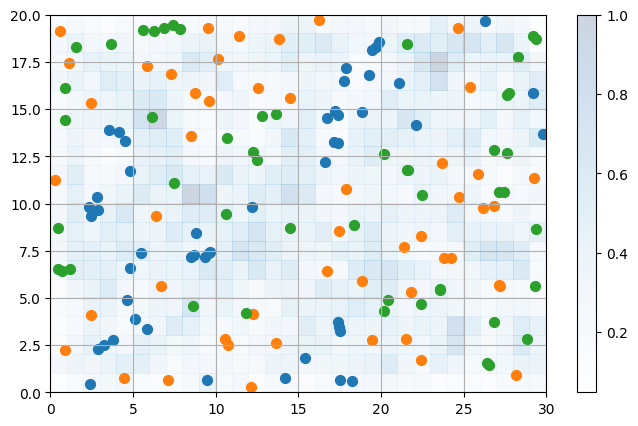

In [34]:
w_x, w_y = zip(*[som.winner(d) for d in x.values])
w_x = np.array(w_x)
w_y = np.array(w_y)

figure (figsize=(8,5),dpi=100)
plt.pcolor(som.distance_map().T, cmap='Blues', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, label=target[c])
plt.grid()
plt.show()

# Exercício de Apoio



### Realizar as seguintes atividades:


1. Gerar redes SOM com outras topologias
2. Avaliar diferentes taxas de aprendizagem (eta) e vizinhança (sigma)
3. Considerar outros datasets



